<a href="https://colab.research.google.com/github/ganesh-shet/ganesh-shet/blob/main/Ecommerce_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
from bs4 import BeautifulSoup
import requests
import pandas as pd


***Creating lists to store descriptions***

In [ ]:

descriptions = []
processors = []
ram = []
storage = []
inches = []
warranty = []
prices = []
os = []


In [ ]:
pages = list(range(1,21))
for page in pages:
  # URL of the website which you want to scrape
  response = requests.get("https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={}".format(page)).text  
  #content = req.content # Get the content
  soup = BeautifulSoup(response,'html.parser')
  #print(soup.prettify())

  desc = soup.find_all('div' , class_='_4rR01T')
  for i in range(len(desc)):
      descriptions.append(desc[i].text)
  len(descriptions)

  commonclass = soup.find_all('li',class_='rgWa7D') 
  # Create empty lists for the features
  for i in range(0,len(commonclass)):
    p=commonclass[i].text # Extracting the text from the tags
    if("Core" in p): 
        processors.append(p)
    elif("RAM" in p): 
        ram.append(p)
    elif("HDD" in p or "SSD" in p):
        storage.append(p)
    elif("Operating" in p):
        os.append(p)
    elif("Display" in p):
        inches.append(p)
    elif("Warranty" in p):
        warranty.append(p)


  price = soup.find_all('div', class_ = '_30jeq3 _1_WHN1') 
  # Extracting price of each laptop from the website
  for i in range(len(price)):
    prices.append(price[i].text)
    len(prices)

     


In [ ]:

print(len(descriptions))
print(len(processors))
print(len(ram))
print(len(os))
print(len(storage))
print(len(warranty))
print(len(inches))
print(len(prices))


480
479
481
490
485
461
485
480


In [ ]:

df = {'Description':descriptions[20],'Processor':processors[20],'RAM':ram[20],'Operating System':os[slice(20)],'Storage':storage[slice(20)],'Display':inches[slice(20)],'Warranty':warranty[slice(20)],'Price':prices[slice(20)]}
dataset = pd.DataFrame(data = df) 

In [ ]:
dataset

,Description,Processor,RAM,Operating System,Storage,Display,Warranty,Price
0,HP 15s Ryzen 3 Dual Core 3250U - (8 GB/1 TB HD...,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,2 TB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹2,99,990"
1,HP 15s Ryzen 3 Dual Core 3250U - (8 GB/1 TB HD...,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year International Travelers Warranty,"₹59,990"
2,HP 15s Ryzen 3 Dual Core 3250U - (8 GB/1 TB HD...,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹61,990"
3,HP 15s Ryzen 3 Dual Core 3250U - (8 GB/1 TB HD...,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD|256 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹44,490"
4,HP 15s Ryzen 3 Dual Core 3250U - (8 GB/1 TB HD...,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹35,847"
5,HP 15s Ryzen 3 Dual Core 3250U - (8 GB/1 TB HD...,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inches) Display,1 Year Onsite Warranty,"₹26,990"
6,HP 15s Ryzen 3 Dual Core 3250U - (8 GB/1 TB HD...,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,1 Year Domestic Brand Warranty on Device,"₹41,490"
7,HP 15s Ryzen 3 Dual Core 3250U - (8 GB/1 TB HD...,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹42,250"
8,HP 15s Ryzen 3 Dual Core 3250U - (8 GB/1 TB HD...,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,"1 Year Limited Hardware Warranty, In Home Serv...","₹36,497"
9,HP 15s Ryzen 3 Dual Core 3250U - (8 GB/1 TB HD...,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD|256 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹57,165"


In [ ]:
dataset.to_csv('laptop.csv')

In [ ]:
import matplotlib.pyplot as plt

**PLOTTING**

In [ ]:
plt.style.use('bmh')
df = pd.read_csv('laptop.csv')

# All Brands
x = df['Display']
y = df['Price']

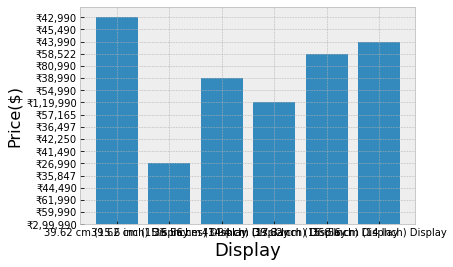

In [ ]:
# Bar chart
plt.xlabel('Display', fontsize=18)
plt.ylabel('Price($)', fontsize=16)
plt.bar(x, y)


plt.show()

# New Section